In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
classes = [
    'Biryani', 'BisibeleBath', 'Butternaan', 'Chaat', 'Chappati', 
    'Dhokla', 'Dosa', 'Gulab Jamun', 'Halwa', 'Idly', 
    'Kaati roll', 'Meduvadai', 'Noodles', 'Paaniyaram', 'Poori', 
    'Samosa', 'Tandoori Chicken', 'Upma', 'Vadapav', 'Pongal'
]

In [3]:
training_path = r'C:\Users\sanje\Downloads\archive (5)\food20dataset\train_set'
test_path = r'C:\Users\sanje\Downloads\archive (5)\food20dataset\test_set'

In [4]:
IMG_SIZE = (224, 224)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='sparse'
)

Found 1400 images belonging to 20 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='sparse'
)

Found 600 images belonging to 20 classes.


In [9]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model layers

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.1387 - loss: 3.0453 - val_accuracy: 0.5367 - val_loss: 1.7862
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4532 - loss: 1.8974 - val_accuracy: 0.7400 - val_loss: 1.1257
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6023 - loss: 1.3484 - val_accuracy: 0.7767 - val_loss: 0.9364
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6823 - loss: 1.0961 - val_accuracy: 0.7683 - val_loss: 0.7872
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7072 - loss: 1.0163 - val_accuracy: 0.8183 - val_loss: 0.6930
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7368 - loss: 0.8692 - val_accuracy: 0.8117 - val_loss: 0.6551
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7844 - loss: 0.7140 - val_accuracy: 0.8233 - val_loss: 0.6135
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7715 - loss: 0.7507 - val_accuracy: 0.8400 - val_loss:

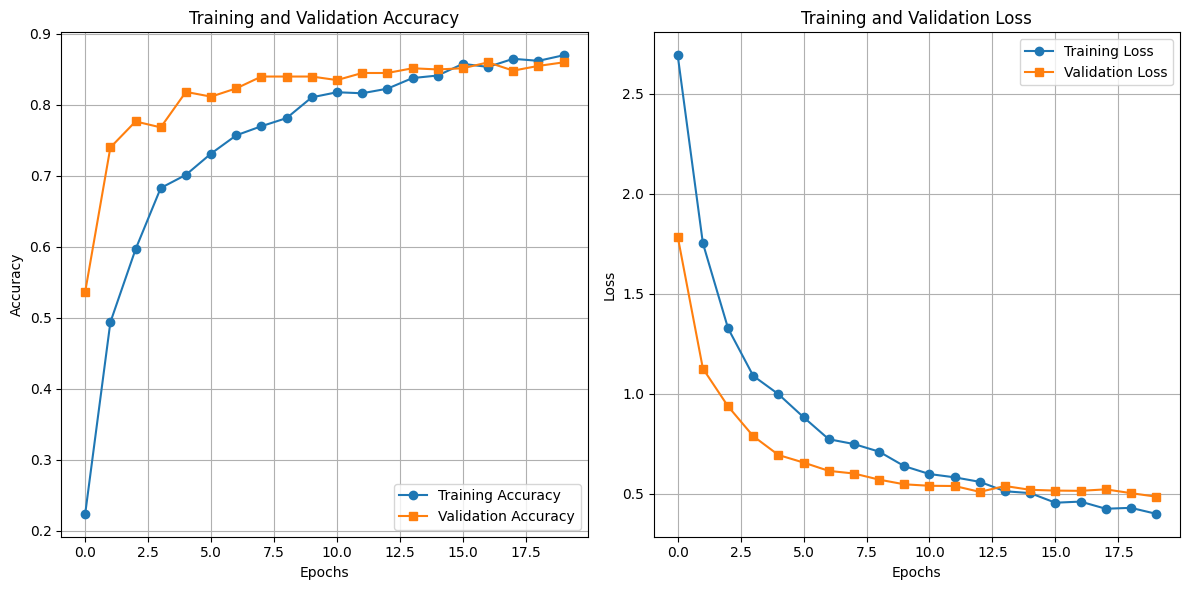

In [14]:
plt.figure(figsize=(12, 6))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')  # Add marker='o'
plt.plot(history.history['val_accuracy'], marker='s', label='Validation Accuracy')  # Add marker='s'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Training Loss')  # Add marker='o'
plt.plot(history.history['val_loss'], marker='s', label='Validation Loss')  # Add marker='s'
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

In [15]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 815ms/step - accuracy: 0.8764 - loss: 0.4318
Test Accuracy: 0.86


In [16]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 906ms/step
                  precision    recall  f1-score   support

         Biryani       0.07      0.07      0.07        30
    BisibeleBath       0.04      0.03      0.04        30
      Butternaan       0.19      0.17      0.18        30
           Chaat       0.00      0.00      0.00        30
        Chappati       0.00      0.00      0.00        30
          Dhokla       0.00      0.00      0.00        30
            Dosa       0.10      0.10      0.10        30
     Gulab Jamun       0.00      0.00      0.00        30
           Halwa       0.08      0.10      0.09        30
            Idly       0.04      0.03      0.03        30
      Kaati roll       0.03      0.03      0.03        30
       Meduvadai       0.11      0.10      0.10        30
         Noodles       0.03      0.03      0.03        30
      Paaniyaram       0.06      0.07      0.07        30
           Poori       0.03      0.03      0.03        30
          Samosa       0.00  

In [20]:
model.save("food_classification_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


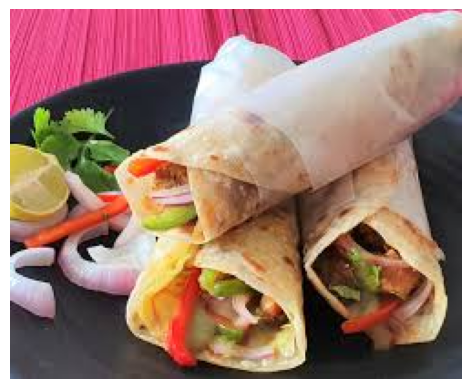

Kaati roll: 97.97%
Samosa: 2.01%
Vadapav: 0.01%
The predicted class is: Kaati roll


In [21]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("food_classification_model.h5")  # Ensure the correct path to the saved model
classes = [
    'Biryani', 'BisibeleBath', 'Butternaan', 'Chaat', 'Chappati', 
    'Dhokla', 'Dosa', 'Gulab Jamun', 'Halwa', 'Idly', 
    'Kaati roll', 'Meduvadai', 'Noodles', 'Paaniyaram', 'Poori', 
    'Samosa', 'Tandoori Chicken', 'Upma', 'Vadapav', 'Pongal'
]

# Define the image preprocessing function
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # IMG_SIZE is (224, 224)
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the test image
image_path = r'C:\Users\sanje\Downloads\roll.jpg'  # Replace with your test image path

# Preprocess and predict
preprocessed_image = load_and_preprocess_image(image_path)
y_pred = model.predict(preprocessed_image)
y_pred_class = np.argmax(y_pred, axis=1)
predicted_class = classes[y_pred_class[0]]

# Display the original image and prediction
original_image = Image.open(image_path)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

# Display the top 3 class probabilities
top_k = np.argsort(y_pred[0])[-3:][::-1]
for i in top_k:
    print(f"{classes[i]}: {y_pred[0][i]*100:.2f}%")

print(f"The predicted class is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


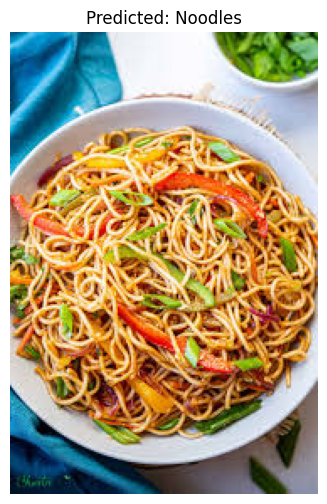

Noodles: 99.99%
Chaat: 0.01%
BisibeleBath: 0.00%


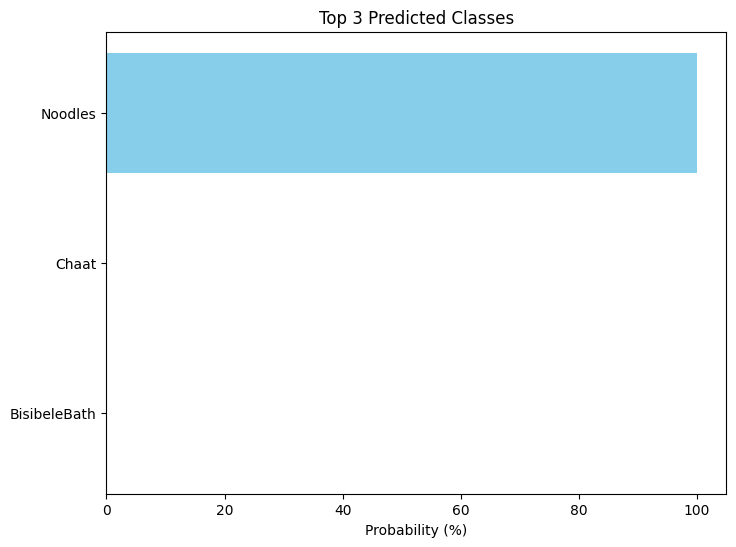

In [33]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the saved model
try:
    model = load_model("food_classification_model.h5")  # Ensure the correct path to the saved model
except Exception as e:
    print(f"Error loading model: {e}")
    exit()
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    

classes = [
    'Biryani', 'BisibeleBath', 'Butternaan', 'Chaat', 'Chappati', 
    'Dhokla', 'Dosa', 'Gulab Jamun', 'Halwa', 'Idly', 
    'Kaati roll', 'Meduvadai', 'Noodles', 'Paaniyaram', 'Poori', 
    'Samosa', 'Tandoori Chicken', 'Upma', 'Vadapav', 'Pongal'
]

# Define the image preprocessing function
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).resize((224, 224))  # IMG_SIZE is (224, 224)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        print(f"Error loading or preprocessing image: {e}")
        return None

# Path to the test image
image_path = r'C:\Users\sanje\Downloads\images.jpg'  # Replace with your test image path


# Preprocess and predict
preprocessed_image = load_and_preprocess_image(image_path)

if preprocessed_image is not None:
    y_pred = model.predict(preprocessed_image)
    y_pred_class = np.argmax(y_pred, axis=1)
    predicted_class = classes[y_pred_class[0]]

    # Display the original image and prediction
    original_image = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    # Display the top 3 class probabilities
    top_k = np.argsort(y_pred[0])[-3:][::-1]
    for i in top_k:
        print(f"{classes[i]}: {y_pred[0][i]*100:.2f}%")

    # Optional: Visualize the top-3 class probabilities using a bar chart
    plt.figure(figsize=(8, 6))
    plt.barh([classes[i] for i in top_k], y_pred[0][top_k]*100, color='skyblue')
    plt.xlabel('Probability (%)')
    plt.title('Top 3 Predicted Classes')
    plt.gca().invert_yaxis()  # To show the highest probability at the top
    plt.show()

else:
    print("Image preprocessing failed.")
